# Zillow Clustering Project

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import wrangle_zillow as wr

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)

# Acquire

In [2]:
df = wr.get_zillow_data()
print(df.shape)
df.head()

(77580, 68)


,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,3100.0,3100.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,633.0,NaN,NaN,33634931.0,-117869207.0,4506.0,NaN,NaN,NaN,NaN,NaN,122,261.0,NaN,6.059063e+07,53571.0,1286.0,NaN,96978.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,1998.0,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,1465.0,1465.0,1465.0,NaN,NaN,1465.0,NaN,6111.0,1.0,1.0,1.0,0.0,NaN,NaN,34449266.0,-119281531.0,12647.0,NaN,NaN,NaN,NaN,NaN,1110,261.0,NaN,6.111001e+07,13091.0,2061.0,NaN,97099.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1967.0,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,NaN,1243.0,1243.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,440.0,NaN,NaN,33886168.0,-117823170.0,8432.0,1.0,NaN,NaN,NaN,1.0,122,261.0,NaN,6.059022e+07,21412.0,1286.0,NaN,97078.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1962.0,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,NaN,NaN,2376.0,2376.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34245180.0,-118240722.0,13038.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LCR110000*,6.037300e+07,396551.0,3101.0,NaN,96330.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1970.0,NaN,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,NaN,NaN,1312.0,1312.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34185120.0,-118414640.0,278581.0,1.0,NaN,NaN,NaN,1.0,010C,266.0,LAR3,6.037124e+07,12447.0,3101.0,268548.0,96451.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1964.0,NaN,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,NaN,NaN,6.037124e+13,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


# Prepare

In [3]:
imputer, scaler, train, validate, test= wr.prep_zillow(df)
imputer

KNNImputer(add_indicator=False, copy=True, metric='nan_euclidean',
           missing_values=nan, n_neighbors=5, weights='uniform')

In [4]:
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [5]:
print(f"   train shape = {train.shape}")
print(f"validate shape = {validate.shape}")
print(f"    test shape = {test.shape}")

   train shape = (31290, 31)
validate shape = (10431, 31)
    test shape = (10431, 31)


In [6]:
train.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,county,tax_rate
30896,0.009697,0.000000,0.000000,0.272727,0.000000,0.039767,6037,0.000000,0.429497,0.640936,0.001013,0100,0.005844,396053,3101,95982,0.0,0.0,0.333333,0.001567,0.001077,0.0,0.000775,0.003098,0.000010,0.510391,2017-04-28,Floor/Wall,Single Family Residential,Los Angeles County,0.066047
19077,0.024845,0.291667,0.333333,0.454545,0.291667,0.239289,6059,0.250000,0.198432,0.956228,0.000999,122,0.296733,12773,1286,96996,0.0,0.0,0.797101,0.070274,0.067845,0.0,0.052443,0.056687,0.000519,0.543068,2017-03-22,None,Single Family Residential,Orange County,0.020079
49660,0.007067,0.000000,0.000000,0.454545,0.000000,0.026083,6037,0.000000,0.478220,0.638716,0.000827,010G,0.001437,12447,3101,95994,0.0,0.0,0.246377,0.007507,0.003399,0.0,0.000884,0.007662,0.000003,0.553112,2017-06-23,Central,Single Family Residential,Los Angeles County,0.053784
66688,0.004009,0.166667,0.333333,0.636364,0.166667,0.111035,6037,0.166667,0.889704,0.636147,0.001319,0100,0.010826,5534,3101,97319,0.0,0.0,0.956522,0.028482,0.013161,0.0,0.003240,0.027332,0.000019,0.569558,2017-08-15,Central,Single Family Residential,Los Angeles County,0.049981
36468,0.022685,0.208333,0.333333,0.454545,0.208333,0.164853,6059,0.166667,0.379497,0.868787,0.001489,1,0.296595,21412,1286,97078,0.0,0.0,0.920290,0.082015,0.055777,0.0,0.031614,0.052995,0.000519,0.565937,2017-05-16,None,Single Family Residential,Orange County,0.022855


In [7]:
train.isna().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
transactiondate                 0
heatingorsystemdesc             0
propertylandusedesc             0
county        

In [8]:
validate.isna().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
transactiondate                 0
heatingorsystemdesc             0
propertylandusedesc             0
county        

In [9]:
test.isna().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
transactiondate                 0
heatingorsystemdesc             0
propertylandusedesc             0
county        

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31290 entries, 30896 to 49750
Data columns (total 31 columns):
parcelid                        31290 non-null float64
bathroomcnt                     31290 non-null float64
bedroomcnt                      31290 non-null float64
buildingqualitytypeid           31290 non-null float64
calculatedbathnbr               31290 non-null float64
calculatedfinishedsquarefeet    31290 non-null float64
fips                            31290 non-null object
fullbathcnt                     31290 non-null float64
latitude                        31290 non-null float64
longitude                       31290 non-null float64
lotsizesquarefeet               31290 non-null float64
propertycountylandusecode       31290 non-null object
rawcensustractandblock          31290 non-null float64
regionidcity                    31290 non-null object
regionidcounty                  31290 non-null object
regionidzip                     31290 non-null object
roomcnt     

In [11]:
train.describe()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,fullbathcnt,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,tax_rate
count,31290.000000,31290.000000,31290.000000,31290.000000,31290.000000,31290.000000,31290.000000,31290.000000,31290.000000,31290.000000,31290.000000,31290.000000,31290.0,31290.000000,31290.000000,31290.000000,31290.0,31290.000000,31290.000000,31290.000000,31290.000000,31290.000000
mean,0.014721,0.108569,0.256468,0.470618,0.108558,0.081280,0.103212,0.461269,0.666993,0.001517,0.166482,0.127325,0.0,0.618606,0.021389,0.021631,0.0,0.017313,0.021954,0.000323,0.569802,0.026883
std,0.014930,0.084613,0.103100,0.125691,0.084597,0.046192,0.082676,0.185320,0.185535,0.010488,0.281780,0.210709,0.0,0.166672,0.028619,0.030653,0.0,0.028462,0.029746,0.005673,0.021990,0.012868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.005255,0.083333,0.222222,0.454545,0.083333,0.051247,0.083333,0.329418,0.559605,0.000769,0.004062,0.000000,0.0,0.521739,0.008424,0.007807,0.0,0.003900,0.008882,0.000007,0.564370,0.023378
50%,0.012240,0.083333,0.222222,0.454545,0.083333,0.069339,0.083333,0.460621,0.688226,0.000942,0.007025,0.000000,0.0,0.594203,0.014362,0.015246,0.0,0.011328,0.015787,0.000012,0.568395,0.024776
75%,0.022394,0.166667,0.333333,0.545455,0.166667,0.098820,0.166667,0.572770,0.804376,0.001220,0.296872,0.333333,0.0,0.731884,0.024550,0.025124,0.0,0.021096,0.024963,0.000519,0.572687,0.027525
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


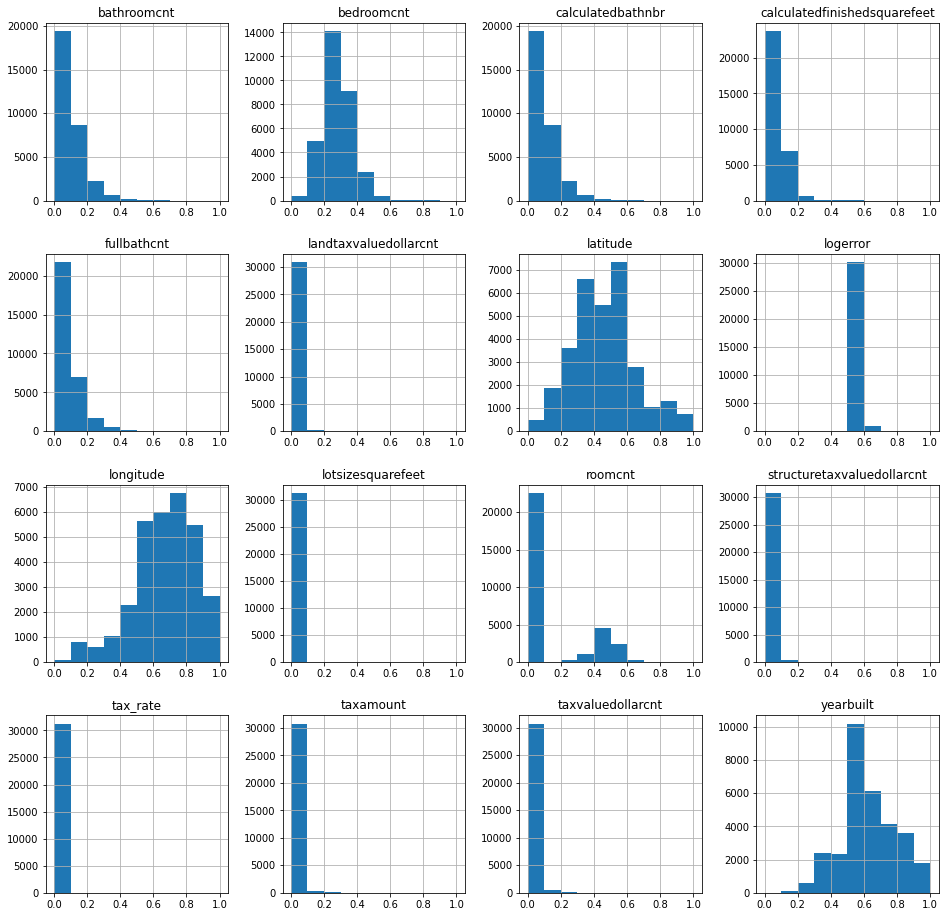

In [12]:
train = wr.convert_dtypes(train, columns=["parcelid", "buildingqualitytypeid", "unitcnt", "assessmentyear", "rawcensustractandblock", "censustractandblock"], dtype="object")
train.hist(figsize=(16, 16))
plt.show()

# Explore

In [13]:
# sns.pairplot(data=train)